# 1. Import Essential Python Libs

In [1]:
#Import necessary python libraries
import numpy as np #algebric computations
import pandas as pd #data processing/handling
import matplotlib.pyplot as plt # data visualization
%matplotlib inline 
import seaborn as sns #for visualization
import warnings #need to suppress warnings
warnings.filterwarnings("ignore")

# 2. Data Reading

In [2]:
loan_df = pd.read_csv('./loan/loan.csv')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_df.shape

(39717, 111)

# 3. Date Cleaning: Remove Redundant or non-relevant column

## 3.1 Remove Columns where all entries are NULL

In [4]:
loan_df = loan_df.dropna(axis='columns')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0


## 3.2 Remove Column which has fixed one value as it may not show relationship

In [5]:
single_value_cols = []
loan_df1_dict = {}
for col in loan_df.columns:
    loan_df1_dict = loan_df[col].value_counts()
    if (len(loan_df1_dict)==1):
        single_value_cols.append(col)


In [6]:
loan_df1 = loan_df.drop(columns=single_value_cols)
loan_df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79


## 3.3 Missing Value Treatment

In [7]:
loan_df1.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries    

## 3.x Let's hypothesize and create a dataframe with more relevant columns to application

* Hypothesis #01: Since problem statement is related to application timing; need to drop columns which are related to post allocation of loan.
    * Following columns can be dropped from further analysis based on above Hypothesis
        * funded_amnt: The total amount committed to that loan at that point in time.
        * funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
        * url: URL for the LC page with listing data; it is record entry for accessing the database
        * delinq_2yrs: this is behaviour post allocation of loan
        * out_prncp: Remaining outstanding principal for total amount funded
        * out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors
        * total_pymnt: Payments received to date for total amount funded
        * total_pymnt_inv: Payments received to date for portion of total amount funded by investors
        * total_rec_prncp: Principal received to date
        * total_rec_int: Interest received to date
        * total_rec_late_fee: Late fees received to date
        * recoveries: post charge off gross recovery
        * collection_recovery_fee: post charge off collection fee
        * last_pymnt_amnt: Last total payment amount received
        


In [8]:
loan_df2 = loan_df1.drop(columns=['funded_amnt','funded_amnt_inv','url','delinq_2yrs',
                                  'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                                  'total_rec_prncp', 'total_rec_int','total_rec_late_fee',
                                  'recoveries','collection_recovery_fee','last_pymnt_amnt'])

* Hypothesis #02: 'id' and 'member_id' are unique identification for identification; may not have relevance to analysis.
    * let's drop both columns

In [9]:
loan_df3 = loan_df2.drop(columns=['id','member_id'])

## 3.4 Let's check and correct the datatype, if required

In [10]:
loan_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   term                 39717 non-null  object 
 2   int_rate             39717 non-null  object 
 3   installment          39717 non-null  float64
 4   grade                39717 non-null  object 
 5   sub_grade            39717 non-null  object 
 6   home_ownership       39717 non-null  object 
 7   annual_inc           39717 non-null  float64
 8   verification_status  39717 non-null  object 
 9   issue_d              39717 non-null  object 
 10  loan_status          39717 non-null  object 
 11  purpose              39717 non-null  object 
 12  zip_code             39717 non-null  object 
 13  addr_state           39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  earliest_cr_line     39717 non-null 

In [11]:
#int_rate is type object, let's analyze and make correction if required
loan_df3['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
20.52%      1
18.36%      1
17.54%      1
16.71%      1
16.20%      1
Name: int_rate, Length: 371, dtype: int64

In [12]:
# 'int_rate' column need treatment to remove %; then it can be used as numerical value for any analysis
loan_df3['int_rate'] = loan_df3['int_rate'].apply(lambda x: 0 if (x=='0%') else float(x[:-1])) #drop last char i.e. % from each value

In [13]:
loan_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   term                 39717 non-null  object 
 2   int_rate             39717 non-null  float64
 3   installment          39717 non-null  float64
 4   grade                39717 non-null  object 
 5   sub_grade            39717 non-null  object 
 6   home_ownership       39717 non-null  object 
 7   annual_inc           39717 non-null  float64
 8   verification_status  39717 non-null  object 
 9   issue_d              39717 non-null  object 
 10  loan_status          39717 non-null  object 
 11  purpose              39717 non-null  object 
 12  zip_code             39717 non-null  object 
 13  addr_state           39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  earliest_cr_line     39717 non-null 

## 3.x Let's Perform Sanity check on Data

* Is range of interest rate correct?

In [14]:
loan_df3['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

* Is loan amount zero?

## 3.3 Visualize distribution of loan status

<AxesSubplot:>

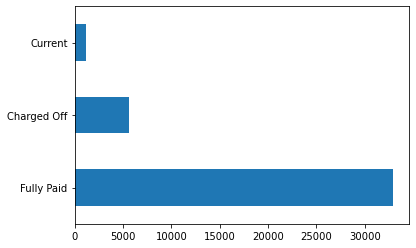

In [69]:
loan_df3['loan_status'].value_counts().plot.barh()

## 3.xx Univariate Analysis

In [68]:
loan_df3[(loan_df3['loan_amnt']==0)]

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,purpose,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc


In [15]:
loan_df3['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [16]:
loan_df3['installment'].describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

<AxesSubplot:>

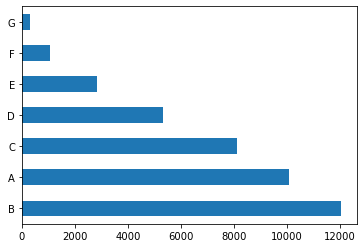

In [17]:
loan_df3['grade'].value_counts().plot.barh()

<AxesSubplot:>

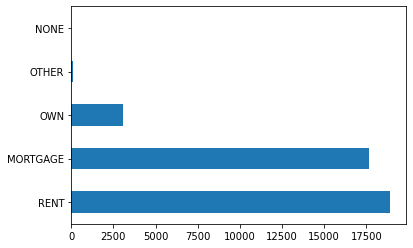

In [18]:
loan_df3['home_ownership'].value_counts().plot.barh()

In [19]:
loan_df3['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:>

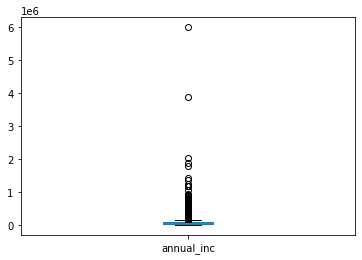

In [56]:
loan_df3['annual_inc'].plot.box()

In [57]:
#'annual_inc' seems to have high variance inside data
# possible apporach may be to create a derived column with ordered categorical variable: 
#Very_Low_Income, Low_Income, Mid_Income, High_Income and Very_High_Income
loan_df3['Income_Bucket']=pd.qcut(loan_df3['annual_inc'], q=[0,0.2,0.4,0.6,0.8,1.0],
                                     labels=['Very_Low_Income','Low_Income','Mid_Income','High_Income',
                                             'Very_High_Income'])

<AxesSubplot:>

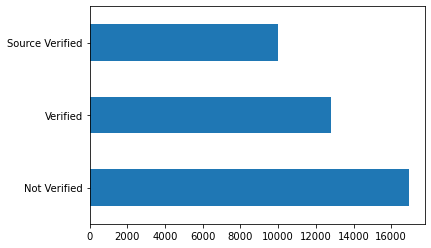

In [20]:
loan_df3['verification_status'].value_counts().plot.barh()

<AxesSubplot:>

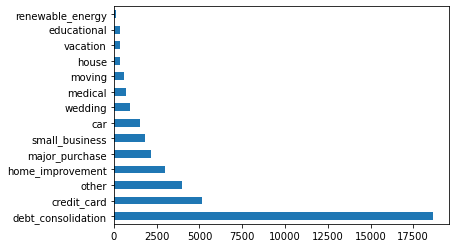

In [21]:
loan_df3['purpose'].value_counts().plot.barh()

In [22]:
loan_df3['dti'].describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [23]:
loan_df3['inq_last_6mths'].describe()

count    39717.000000
mean         0.869200
std          1.070219
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

In [25]:
loan_df3['open_acc'].describe()

count    39717.000000
mean         9.294408
std          4.400282
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [29]:
loan_df3['pub_rec'].describe()

count    39717.000000
mean         0.055065
std          0.237200
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

In [30]:
#need to drop this column since it has no useful information
loan_df3 = loan_df3.drop(columns='pub_rec')

In [31]:
loan_df3['revol_bal'].describe()

count     39717.000000
mean      13382.528086
std       15885.016641
min           0.000000
25%        3703.000000
50%        8850.000000
75%       17058.000000
max      149588.000000
Name: revol_bal, dtype: float64

<AxesSubplot:>

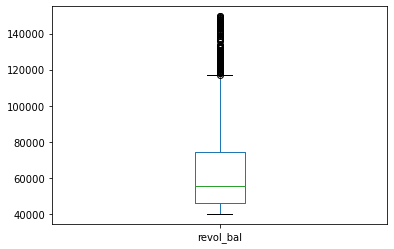

In [51]:
loan_df3[(loan_df3['revol_bal']>40000)]['revol_bal'].plot.box()

In [52]:
loan_df3[(loan_df3['revol_bal']>40000)]['revol_bal'].describe()

count      2142.000000
mean      64033.328198
std       23941.597459
min       40016.000000
25%       45992.500000
50%       55619.500000
75%       74357.000000
max      149588.000000
Name: revol_bal, dtype: float64

In [53]:
loan_df3[(loan_df3['revol_bal']<40000)&(loan_df3['loan_status']=='Charged Off')]['revol_bal'].shape

(5313,)

In [46]:
#'revold_bal' seems to have high variance inside data
# possible apporach may be to create a derived column with ordered categorical variable: 
#Very_Low_Revol_Bal, Low_Revol_Bal, Mid_Revol_Bal, High_Revol_Bal and Very_High_Revol_Bal
loan_df3['Revol_Bal_Bucket']=pd.qcut(loan_df3['revol_bal'], q=[0,0.2,0.4,0.6,0.8,1.0],
                                     labels=['Very_Low_Revol_Bal','Low_Revol_Bal','Mid_Revol_Bal','High_Revol_Bal',
                                             'Very_High_Revol_Bal'])

In [54]:
loan_df3['total_acc'].describe()

count    39717.000000
mean        22.088828
std         11.401709
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

<AxesSubplot:>

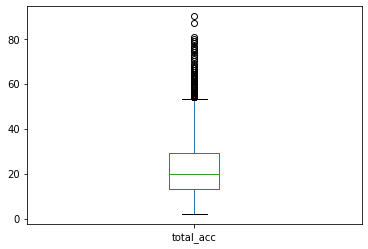

In [55]:
loan_df3['total_acc'].plot.box()

## 3.xx Bivariate Analysis

In [58]:
loan_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            39717 non-null  int64   
 1   term                 39717 non-null  object  
 2   int_rate             39717 non-null  float64 
 3   installment          39717 non-null  float64 
 4   grade                39717 non-null  object  
 5   sub_grade            39717 non-null  object  
 6   home_ownership       39717 non-null  object  
 7   annual_inc           39717 non-null  float64 
 8   verification_status  39717 non-null  object  
 9   issue_d              39717 non-null  object  
 10  loan_status          39717 non-null  object  
 11  purpose              39717 non-null  object  
 12  zip_code             39717 non-null  object  
 13  addr_state           39717 non-null  object  
 14  dti                  39717 non-null  float64 
 15  earliest_cr_line   

## 3.4 Analyze relationship of "Charged Off" with customer related params

In [70]:
loan_df_charged_off = loan_df3[(loan_df3['loan_status']=='Charged Off')]

In [71]:
loan_df_charged_off.shape

(5627, 21)

In [72]:
loan_df_charged_off.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            5627 non-null   int64  
 1   term                 5627 non-null   object 
 2   int_rate             5627 non-null   float64
 3   installment          5627 non-null   float64
 4   grade                5627 non-null   object 
 5   sub_grade            5627 non-null   object 
 6   home_ownership       5627 non-null   object 
 7   annual_inc           5627 non-null   float64
 8   verification_status  5627 non-null   object 
 9   issue_d              5627 non-null   object 
 10  loan_status          5627 non-null   object 
 11  purpose              5627 non-null   object 
 12  zip_code             5627 non-null   object 
 13  addr_state           5627 non-null   object 
 14  dti                  5627 non-null   float64
 15  earliest_cr_line     5627 non-null   

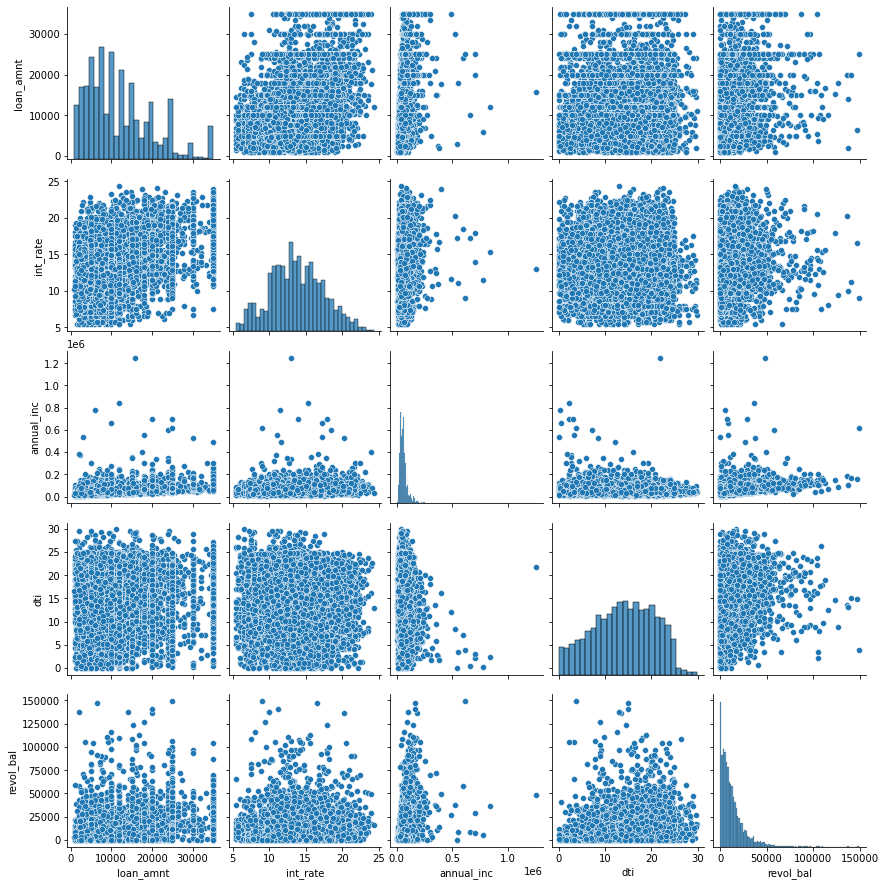

In [101]:
sns.pairplot(loan_df_charged_off[['loan_amnt','int_rate','annual_inc','dti','revol_bal']])

In [100]:
loan_df_charged_off.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            5627 non-null   int64  
 1   term                 5627 non-null   object 
 2   int_rate             5627 non-null   float64
 3   installment          5627 non-null   float64
 4   grade                5627 non-null   object 
 5   sub_grade            5627 non-null   object 
 6   home_ownership       5627 non-null   object 
 7   annual_inc           5627 non-null   float64
 8   verification_status  5627 non-null   object 
 9   issue_d              5627 non-null   object 
 10  loan_status          5627 non-null   object 
 11  purpose              5627 non-null   object 
 12  zip_code             5627 non-null   object 
 13  addr_state           5627 non-null   object 
 14  dti                  5627 non-null   float64
 15  earliest_cr_line     5627 non-null   

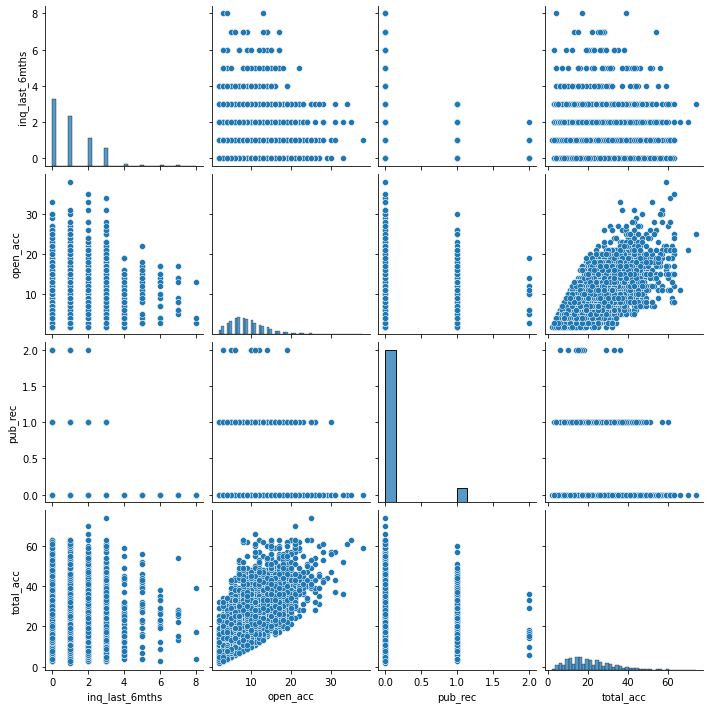

In [102]:
sns.pairplot(loan_df_charged_off[['inq_last_6mths','open_acc','pub_rec','total_acc']])